# Multiple Non-Linear Regression Model

The dataset used for this project, `concrete.csv`, is downloaded from [GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/concrete.csv).

## Objectives:

1. **Import Necessary Libraries:**
   - Load essential Python libraries required for data manipulation, visualization, and model building.

2. **Read and View Dataset:**
   - Read the dataset from a CSV file and display its contents to understand the structure and features.

3. **Check for Missing Values:**
   - Identify and handle any missing values in the dataset to ensure data quality and completeness.

4. **Exploratory Data Analysis (EDA):**
   - Visualize the dataset to uncover patterns, trends, and relationships among the features.
   - Calculate **Pearson correlation coefficients** to identify linear relationships between variables.

5. **Train Linear and Polynomial Regression Models:**
   - Use the scikit-learn library to train both linear and non-linear (polynomial) regression models.
   - Evaluate the models using **Model Performance Metrics** such as Mean Squared Error (MSE) and $R^2$ on training, cross-validation, and testing data.

6. **Select the Optimum Model:**
   - Analyze the performance metrics to determine the most suitable model for the dataset.

7. **Build and Train Custom Polynomial Model:**
   - Develop a custom polynomial regression model.
   - Train the custom model using gradient descent and evaluate its performance.

8. **Compare Custom Model with Scikit-Learn Model:**
   - Compare the performance of the custom model with the scikit-learn model to validate its effectiveness.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Read the dataset from the CSV file and save it into a variable
data = pd.read_csv("concrete.csv")
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### Attributes information from `Kaggle` by `VISHVANATH METKARI`:
- **Cement** (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Blast Furnace Slag** (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Fly Ash** (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Water** (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Superplasticizer** (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Coarse Aggregate** (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Fine Aggregate** (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
- **Age** -- quantitative -- Day (1~365) -- Input Variable
- **Concrete compressive strength** -- quantitative -- MPa(megapascals) -- Output Variable

In [3]:
# Check for any missing values in a dataset
data.isna().any()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

Just as we did with the multiple linear regression project, we will approach this dataset as if it is unknown. We will employ techniques such as **Exploratory Data Analysis (EDA)** to visualize the dataset, calculating **Pearson correlation coefficients** to identify linear relationships, and evaluating **Model Performance Metrics** to better understand which model to choose for this particular dataset.

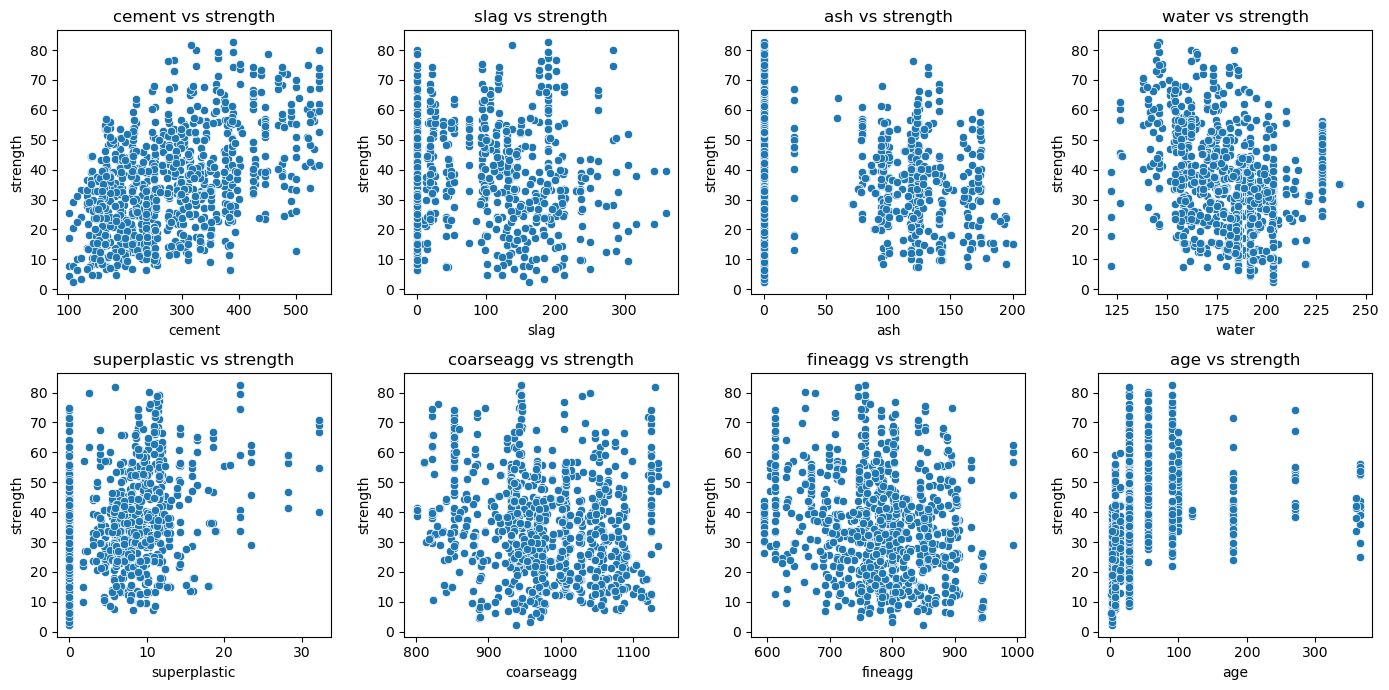

In [4]:
# Create a figure with a 2x4 grid of subplots
_, axes = plt.subplots(2, 4, figsize=(14, 7))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a scatter plot
for i, feature in enumerate(data.columns[:-1]):
    sns.scatterplot(data=data, x=feature, y=data.columns[-1], ax=axes[i])
    axes[i].set_title(f"{feature} vs {data.columns[-1]}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(data.columns[-1])

# Adjust layout to prevent overlap
plt.tight_layout()

By examining the above plots of each feature variable against the target variable, it appears that the first plot of **cement vs. strength** suggests a weak positive correlation, while the other plots do not seem to exhibit any noticeable linear correlation. To gain a more quantitative understanding of the relationships between the features and the target variable, we will calculate the **Pearson correlation coefficients** next.

In [5]:
# Calculate Pearson correlation coefficients matrix
correlation_matrix = data.corr()

# Extract correlation coefficients of features with the target variable
target_correlations = correlation_matrix[data.columns[-1]][:-1]

# Reset the index to convert Series to DataFrame for seaborn bar plot
correlation_df = target_correlations.reset_index()
correlation_df.columns = ["Feature", "Correlation"]

correlation_df

,Feature,Correlation
0,cement,0.497832
1,slag,0.134829
2,ash,-0.105755
3,water,-0.289633
4,superplastic,0.366079
5,coarseagg,-0.164935
6,fineagg,-0.167241
7,age,0.328873


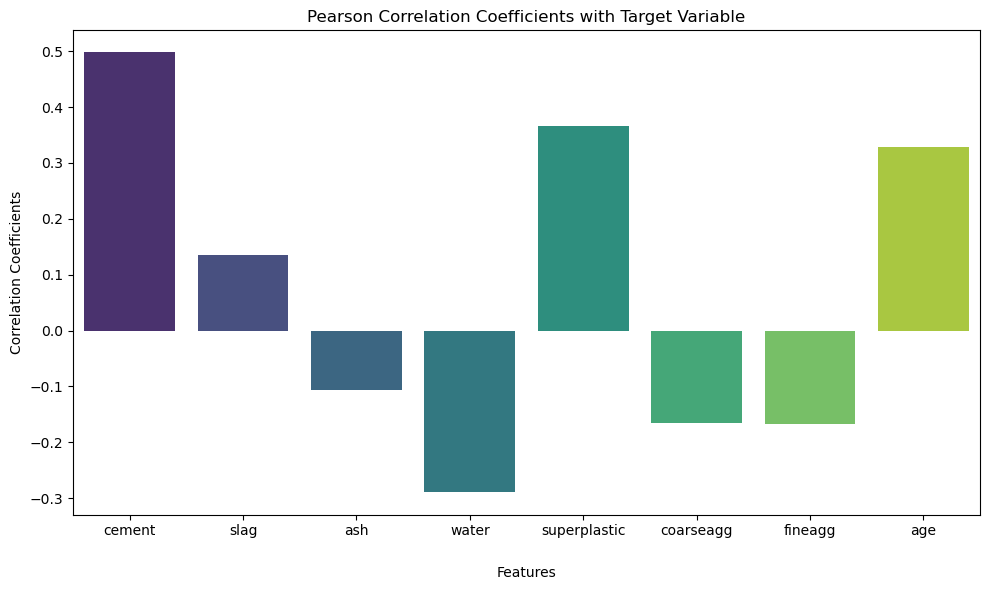

In [6]:
# Create a seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_df, x="Feature", y="Correlation", hue="Feature", palette="viridis")
plt.title("Pearson Correlation Coefficients with Target Variable")
plt.xlabel("Features", labelpad=20)
plt.ylabel("Correlation Coefficients")
plt.tight_layout()

The **Pearson correlation coefficients** reveal varying degrees of linear relationships between the features and the target variable (strength). **Cement** shows a moderate positive correlation `(0.498)`, indicating that as cement increases, strength also tends to increase. **Superplastic** `(0.366)` and **Age** `(0.329)` also exhibit positive correlations with strength but weak. Conversely, **Water** has a weak negative correlation `(-0.290)`, suggesting that higher water content reduces strength. **Ash** `(-0.106)`, **Coarse aggregate** `(-0.165)`, and **Fine aggregate** `(-0.167)` show very weak negative correlations, indicating slight decreases in strength with higher quantities of these materials. **Slag** has a very weak positive correlation `(0.135)`. While these coefficients help identify which features are more influential on the target variable (strength), to determine the most suitable model among different options, we will employ the last technique of evaluating **Model Performance Metrics**.

This time, we'll begin by training linear regression and non-linear/polynomial regression models using scikit-learn. Afterwards, we'll compare the results of the optimal model found with scikit-learn to our custom-made model, which is based on the resulting model from scikit-learn.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract feature variables (X) and target variable (y) from the DataFrame
X = np.array(data[data.columns[:-1]])
y = np.array(data[data.columns[-1]])

# Split the dataset into training, cross-validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train linear and non-linear/polynomial regression models and evaluate each model
degrees = [1, 2, 3, 4, 5]
models = {}

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree, include_bias=False), StandardScaler(), LinearRegression())
    model.fit(X_train, y_train)
    
    # Evaluate on training data
    y_pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    # Evaluate on cross-validation data
    y_pred_cv = model.predict(X_cv)
    mse_cv = mean_squared_error(y_cv, y_pred_cv)
    r2_cv = r2_score(y_cv, y_pred_cv)
    
    # Save the model
    models[degree] = model

    print(f"Polynomial Regression (Degree {degree}):") if degree != 1 else print("Linear Regression:")
    print("Training Mean Squared Error:", mse_train)
    print("Cross-Validation Mean Squared Error:", mse_cv)
    print("Training R^2 Score:", r2_train)
    print("Cross-Validation R^2 Score:", r2_cv)
    print()

Linear Regression:
Training Mean Squared Error: 107.23993872814277
Cross-Validation Mean Squared Error: 120.47566992354584
Training R^2 Score: 0.6196723710532999
Cross-Validation R^2 Score: 0.5822578426365101

Polynomial Regression (Degree 2):
Training Mean Squared Error: 51.61165108892274
Cross-Validation Mean Squared Error: 65.64019886896378
Training R^2 Score: 0.8169587085047161
Cross-Validation R^2 Score: 0.7723965485920048

Polynomial Regression (Degree 3):
Training Mean Squared Error: 19.217147446158474
Cross-Validation Mean Squared Error: 29.74261228938015
Training R^2 Score: 0.931846174009436
Cross-Validation R^2 Score: 0.8968692763337504

Polynomial Regression (Degree 4):
Training Mean Squared Error: 4.314577789109212
Cross-Validation Mean Squared Error: 111331.10211618175
Training R^2 Score: 0.9846983021447087
Cross-Validation R^2 Score: -385.03391713183794

Polynomial Regression (Degree 5):
Training Mean Squared Error: 1.7599853775857792
Cross-Validation Mean Squared Error: 

The evaluation of regression models reveals that linear regression provides a moderate fit with a training MSE of `107.24` and an $R^2$ of `0.62`, while cross-validation performance slightly drops. Polynomial regression models of degrees **2** and **3** significantly improve both training and cross-validation performance, indicating better fit and generalization. However, models of degrees **4** and **5** suffer from severe overfitting, with extremely low training MSEs but drastically high cross-validation errors, making them impractical despite their apparent training accuracy. Thus, polynomial models of degree **2** or **3** are optimal for balancing fit and generalization. Therefore, we will test these two models on the testing data to determine the optimal one.

In [8]:
# Evaluate polynomial models of degree 2 and 3 on testing data
for degree in [2, 3]:
    polynomial_model = models.get(degree)
    y_pred_test = polynomial_model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"Polynomial Regression (Degree {degree}):")
    print("Test Mean Squared Error:", mse_test)
    print("Test R^2 Score:", r2_test)
    print()

Polynomial Regression (Degree 2):
Test Mean Squared Error: 54.46615855733744
Test R^2 Score: 0.7823789601157968

Polynomial Regression (Degree 3):
Test Mean Squared Error: 44.45691878472008
Test R^2 Score: 0.8223711539011225



Based on testing data evaluation, both degree **2** and degree **3** polynomial regression models perform well. However, the degree **3** model demonstrates better predictive accuracy, with a lower Mean Squared Error of `44.46` and a higher $R^2$ score of `0.82`. Therefore, the degree **3** polynomial regression model is deemed optimal for our dataset. Now, we will build our custom polynomial regression model of degree **3** and compare the results with the scikit-learn optimum model.

We can represent our polynomial regression model of degree **3** with the following vectorized equation:

$$
\begin{equation}
\hat{\mathbf{y}} = f(\mathbf{X}) = \mathbf{X} \cdot \mathbf{w} + b
\end{equation}
$$

where:
- $\hat{\mathbf{y}}$ represents the vector of predicted variables (dependent variables) for all training examples,
- $\mathbf{X}$ represents the matrix of input features (independent variables),
- $\mathbf{w}$ represents the vector of weights (coefficients),
- $b$ represents the $y$-intercept (bias term).

Our goal is to find the optimal values of $\mathbf{w}$ and $b$ that minimize the Mean Squared Error (MSE) cost function. The MSE is defined as:

$$
\begin{equation}
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y_i})^2 \tag{2}
\end{equation}
$$

where:
- $m$ is the number of data points,
- $y_i$ is the actual target value for the $i$-th data point,
- $\hat{y_i}$ is the predicted value for the $i$-th data point.

To update our parameters, we will use the gradient descent optimization algorithm:

$$
\begin{equation}
w_{j, \text{new}} = w_{j, \text{old}} - \alpha \times \frac{\partial \text{MSE}}{\partial w_j} \tag{3}
\end{equation}
$$

$$
\begin{equation}
b_{\text{new}} = b_{\text{old}} - \alpha \times \frac{\partial \text{MSE}}{\partial b} \tag{4}
\end{equation}
$$

where:
- $j = 1, 2, 3, \ldots, n$
- $w_{j, \text{new}}$ and $w_{j, \text{old}}$ are the updated and current weights for the $j$-th feature, respectively,
- $b_{\text{new}}$ and $b_{\text{old}}$ are the updated and current $y$-intercepts, respectively,
- $\alpha$ is the learning rate,
- $\frac{\partial \text{MSE}}{\partial w_j}$ is the gradient of the Mean Squared Error (MSE) with respect to the $j$-th weight,
- $\frac{\partial \text{MSE}}{\partial b}$ is the gradient of the MSE with respect to the $y$-intercept.

and,

$$
\begin{equation}
\frac{\partial \text{MSE}}{\partial w_j} = \frac{2}{m} \sum_{i=1}^{m} (\hat{y_i} - y_i) \cdot (x^j_i) \tag{5}
\end{equation}
$$

$$
\begin{equation}
\frac{\partial \text{MSE}}{\partial b} = \frac{2}{m} \sum_{i=1}^{m} (\hat{y_i} - y_i) \tag{6}
\end{equation}
$$

In [9]:
from itertools import combinations_with_replacement


def polynomial_features_multiple(X: np.ndarray, degree: int) -> np.ndarray:
    """
    Generate polynomial features for a given dataset X up to a specific degree.
    
    Parameters:
    X (np.ndarray): The input dataset of shape (n_samples, n_features).
    degree (int): The degree of the polynomial features.
    
    Returns:
    np.ndarray: A new dataset with polynomial features of shape (n_samples, n_output_features).
    
    """
    
    n_features = X.shape[1]
    
    # List to hold the polynomial features
    features = []
    
    # Add polynomial features of all degrees from 1 to the specified degree
    for d in range(1, degree + 1):
        for indices in combinations_with_replacement(range(n_features), d):
            new_feature = np.prod(X[:, indices], axis=1)
            features.append(new_feature)
    
    return np.array(features).T

In [10]:
def train_multiple_non_lr_model(X: np.ndarray, y: np.ndarray, degree: int, alpha: float=0.01, \
                            iterations: int=1000) -> tuple[np.ndarray, np.ndarray, np.ndarray, float, np.ndarray]:
    """
    Train a multiple non-linear regression model using polynomial features.

    Parameters:
    X (np.ndarray): Input features data of shape (n_samples, n_features)
    y (np.ndarray): Target data of shape (n_samples,)
    degree (int): The degree of the polynomial features.
    alpha (float): Learning rate for gradient descent.
    iterations (int): Number of iterations for gradient descent.
    
    Returns:
    X_poly (np.ndarray): Polynomial features of the input data.\n
    y_hat (np.ndarray): Predicted values (outputs) for the standardized polynomial features of the input data.\n
    w (np.ndarray): Final weights after training.\n
    b (float): Final bias after training.\n
    learning_curve_data (np.ndarray): Data for learning curve (iterations vs cost).
    
    """

    # Generate polynomial features
    X_poly = polynomial_features_multiple(X, degree)
    
    # Standardize the data using z-score standardization
    X_poly_mean = X_poly.mean(axis=0)
    X_poly_std = X_poly.std(axis=0)
    X_poly_scaled = (X_poly - X_poly_mean) / X_poly_std

    # Initialize weights and bias
    w = np.random.randn(X_poly.shape[1])
    b = 0.0  # Initialize bias

    # List to store learning curve data
    learning_curve_data = []

    # Gradient descent loop
    for i in range(iterations):
        # Compute model predictions
        y_hat = np.dot(X_poly_scaled, w) + b

        # Compute Mean Squared Error (MSE) cost
        cost = np.mean((y - y_hat)**2)
        print(f"Iteration: {i+1}, cost={cost}")

        # Record cost for every 100 iterations
        if ((i+1) % 100) == 0:
            learning_curve_data.append([i+1, cost])
        
        # Update weights and bias using gradient descent
        if (i+1) != iterations:
            # Calculate gradients
            dw = (2 / len(y)) * X_poly_scaled.T @ (y_hat - y)
            db = (2 / len(y)) * np.sum(y_hat - y)

            # Update weights and bias
            w -= alpha * dw
            b -= alpha * db

    return X_poly, y_hat, w, b, np.array(learning_curve_data)

In [11]:
# Train degree 3 polynomial model
X_train_poly, y_hat, w, b, lcd = train_multiple_non_lr_model(X_train, y_train, 3, alpha=0.024, iterations=10000)

Iteration: 1, cost=1744.860017024328
Iteration: 2, cost=1368.613602466685
Iteration: 3, cost=1198.8231921688828
Iteration: 4, cost=1076.8400496625136
Iteration: 5, cost=975.800842806549
Iteration: 6, cost=887.6181663120382
Iteration: 7, cost=809.1082691229252
Iteration: 8, cost=738.6243458813761
Iteration: 9, cost=675.0917194572362
Iteration: 10, cost=617.6990175318018
Iteration: 11, cost=565.7839537738645
Iteration: 12, cost=518.7831888981667
Iteration: 13, cost=476.206378538265
Iteration: 14, cost=437.620806352138
Iteration: 15, cost=402.64130379293067
Iteration: 16, cost=370.9230998916368
Iteration: 17, cost=342.1564310488539
Iteration: 18, cost=316.0622802518511
Iteration: 19, cost=292.38888440256505
Iteration: 20, cost=270.90879222393573
Iteration: 21, cost=251.4163358300026
Iteration: 22, cost=233.72542601314973
Iteration: 23, cost=217.66760959373863
Iteration: 24, cost=203.090344768378
Iteration: 25, cost=189.85546168435732
Iteration: 26, cost=177.83778295680926
Iteration: 27, c

Text(0, 0.5, 'Cost')

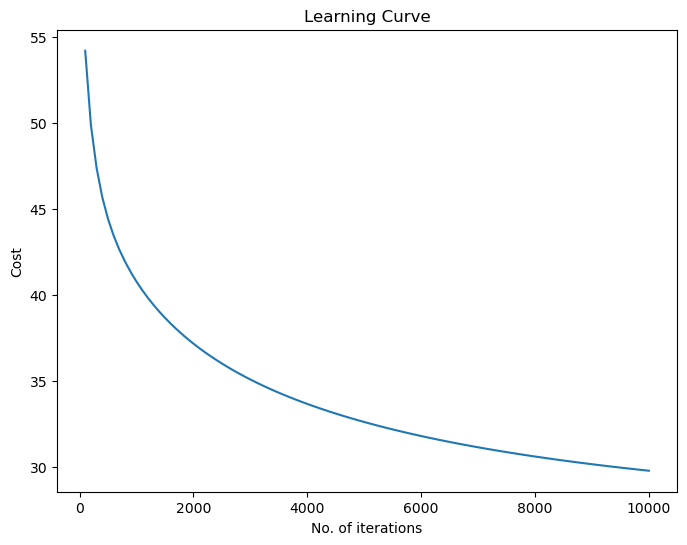

In [12]:
# Visualize the learning curve data
plt.figure(figsize=(8, 6))
sns.lineplot(x=lcd[:, 0], y=lcd[:, 1])
plt.title("Learning Curve")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")

While our custom model reaches a minimum cost of **29.78** on the training data, which is **higher** than the scikit-learn model's cost of **19.22**, the number of iterations required is quite high at **10,000**. The training data was standardized, and the learning rate ($\alpha$) is at its peak value. As increasing the number of iterations further would be computationally expensive and time-consuming, we will maintain this iteration count. The learning curve data confirms that gradient descent is effectively minimizing the **Mean Squared Error** cost function, though not as efficiently as the scikit-learn model. Next, we will evaluate our custom model on cross-validation and test data and compare the results with the scikit-learn model.


In [13]:
# Transform the cross-validation and test data using polynomial features of degree 3
X_cv_poly = polynomial_features_multiple(X_cv, 3)
X_test_poly = polynomial_features_multiple(X_test, 3)

# Calculate the mean and standard deviation of the training features
X_train_mean = X_train_poly.mean(axis=0)
X_train_std = X_train_poly.std(axis=0)

# Standardize the cross-validation and test features using the training data's statistics
X_cv_poly_scaled = (X_cv_poly - X_train_mean) / X_train_std
X_test_poly_scaled = (X_test_poly - X_train_mean) / X_train_std 

# Predict values for cross-validation and test sets using the custom model parameters
y_pred_cv_ = np.dot(X_cv_poly_scaled, w) + b
y_pred_test_ = np.dot(X_test_poly_scaled, w) + b

# Calculate the Mean Squared Error (MSE) for training, cross-validation, and test sets
train_mse = mean_squared_error(y_train, y_hat)
cv_mse = mean_squared_error(y_cv, y_pred_cv_)
test_mse = mean_squared_error(y_test, y_pred_test_)

# Calculate the R^2 score for training, cross-validation, and test sets
train_r2 = r2_score(y_train, y_hat)
cv_r2 = r2_score(y_cv, y_pred_cv_)
test_r2 = r2_score(y_test, y_pred_test_)

# Print the results of the custom polynomial degree 3 model
print("Results of Custom Degree 3 Polynomial Model:\n")
print(f"Training Mean Squared Error: {train_mse}")
print(f"Cross-Validation Mean Squared Error: {cv_mse}")
print(f"Test Mean Squared Error: {test_mse}\n")
print(f"Training R^2 Score: {train_r2}")
print(f"Cross-Validation R^2 Score: {cv_r2}")
print(f"Test R^2 Score: {test_r2}")

Results of Custom Degree 3 Polynomial Model:

Training Mean Squared Error: 29.782404978589998
Cross-Validation Mean Squared Error: 41.95268874483783
Test Mean Squared Error: 41.667251619348264

Training R^2 Score: 0.8943763713018144
Cross-Validation R^2 Score: 0.8545315687840606
Test R^2 Score: 0.8335173460604233


Results of Scikit-Learn Degree 3 Polynomial Model:<br>

Training Mean Squared Error: 19.217147446158474<br>
Cross-Validation Mean Squared Error: 29.74261228938015<br>
Test Mean Squared Error: 44.45691878472008<br>

Training R^2 Score: 0.931846174009436<br>
Cross-Validation R^2 Score: 0.8968692763337504<br>
Test R^2 Score: 0.8223711539011225

The **custom degree 3 polynomial model** achieved a **training MSE** of **29.78** and a **cross-validation MSE** of **41.95**, with corresponding **R² scores** of **0.894 (training)** and **0.854 (cross-validation)**. The **scikit-learn model**, shows better performance on the training and cross-validation sets with a **training MSE** of **19.22** and **cross-validation MSE** of **29.74**, with corresponding **R² scores** of **0.932 (training)** and **0.897 (cross-validation)**. The **custom model** demonstrates stronger generalization on the test set, with a **test R² score of 0.834** and a **test MSE of 41.67**, compared to **0.822** and **44.46** respectively for the scikit-learn model. While the scikit-learn model outperforms in training and cross-validation, the custom model shows advantage in test set performance. With these results, the goal of building a multiple non-linear regression model is completed.